In [249]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(15100873)

In [250]:
np.random.seed(15100873)
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

def least_square_estimator(X, y):
    """ 
    inputs: 
    X inputs np.array of xize (Nx(d+1)) where n>d
    y data to fit 
    returns: 
    b (np .array of size d+1 with least squares estimator of y given x)
    """
    assert len(X)>(len(X[0])-1), "matrix must have N>D"
    return np.linalg.inv(X.T@X)@X.T@y
def empirical_risk(X,y,b):
    """
    inputs:
    X input matrix (NX(d+1))
    y target (N)
    b (d+1) parameters for x
    output: 
    int empyrical risk 
    """
    return np.mean( ( (X@b) -y )**2 )/2
def empyrical_estimation_error(X_test,y_test, b,super_b):
    return empirical_risk(X_test, y_test,b)- empirical_risk(X_test,y_test,super_b)

In [251]:
np.random.seed(15100873)
a=get_a(5)
x_train,y_train=draw_sample(5,a,10)
x_test,y_test=draw_sample(5,a,1000)




In [252]:
X=get_design_mat(x_train, 5)
b=least_square_estimator(X,y_train)
X_lower_d=get_design_mat(x_train, 3)
b_lower_d=least_square_estimator(X_lower_d,y_train)

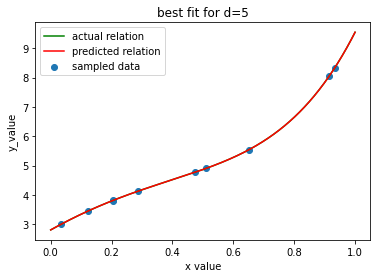

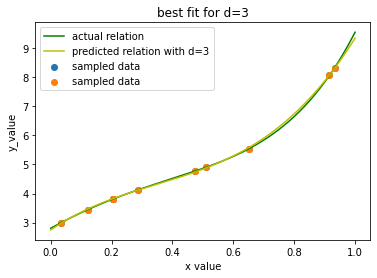

In [253]:
plt.scatter(x_train,y_train,label="sampled data")
x_range = np.linspace(0, 1, 1000)
plt.plot(x_range,get_design_mat(x_range,5)@a,label="actual relation", color='g')
plt.xlabel("x value")
plt.ylabel("y_value")
plt.title("best fit for d=5")
plt.legend()

#plt.show()
plt.plot(x_range,get_design_mat(x_range,5)@b,label="predicted relation", color='r')
# plt.scatter(x_train,y_train,label="sampled data")
plt.xlabel("x value")
plt.ylabel("y_value")
plt.legend()
plt.show()


plt.scatter(x_train,y_train,label="sampled data")
x_range = np.linspace(0, 1, 1000)
plt.plot(x_range,get_design_mat(x_range,5)@a,label="actual relation", color='g')
plt.xlabel("x value")
plt.ylabel("y_value")
plt.legend()
plt.title("best fit for d=3")
plt.plot(x_range,get_design_mat(x_range,3)@b_lower_d,label="predicted relation with d=3", color='y')
plt.scatter(x_train,y_train,label="sampled data")
plt.xlabel("x value")
plt.ylabel("y_value")
plt.legend()



Plot et and eg as a function of N for d < N < 1000 for d = 2, d = 5 and d = 10

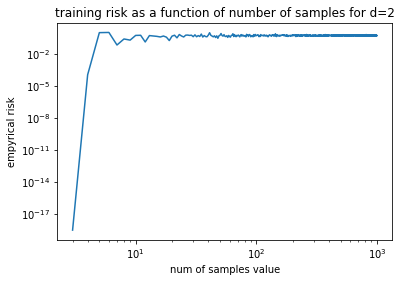

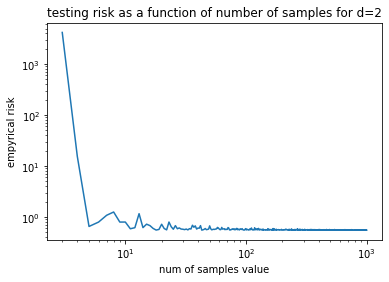

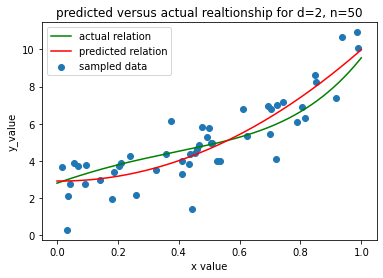

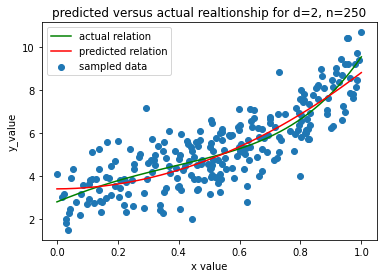

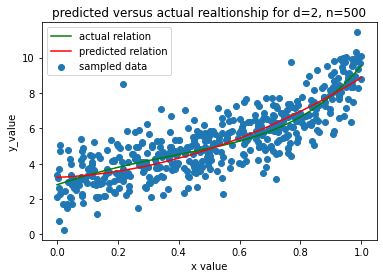

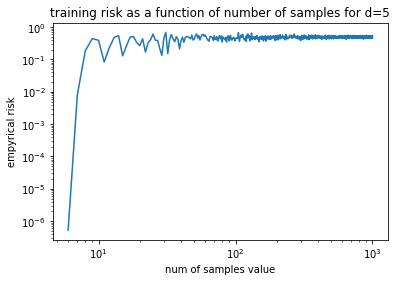

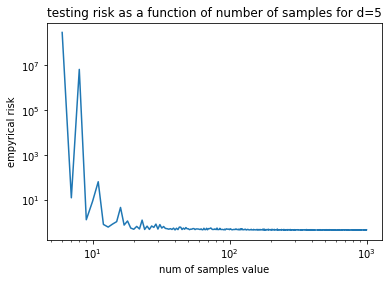

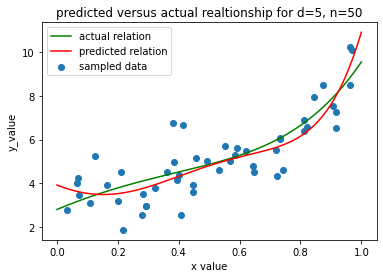

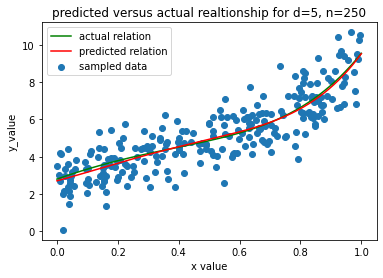

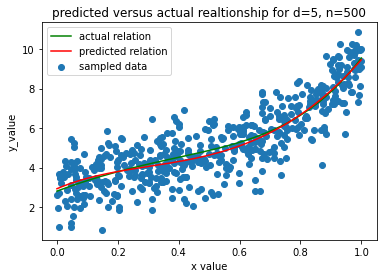

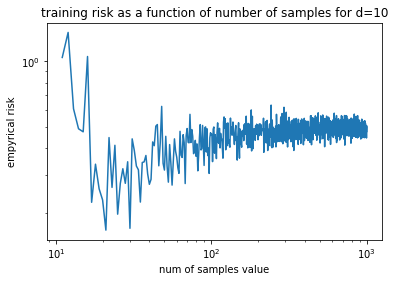

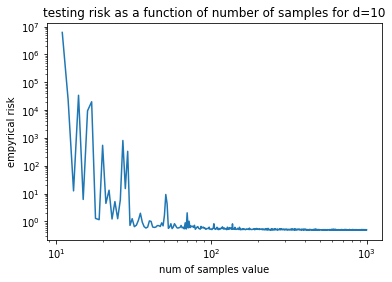

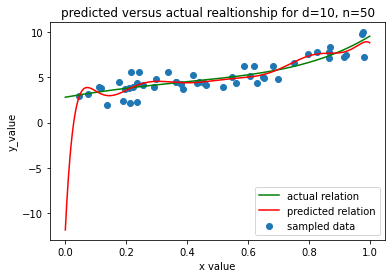

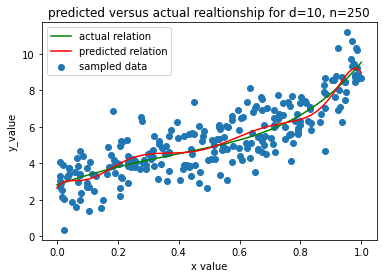

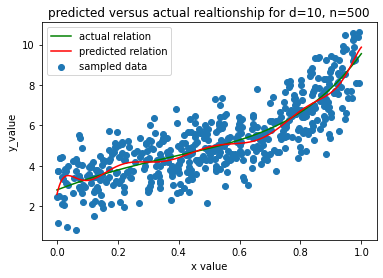

In [254]:
np.random.seed(15100873)
def error_for_n(d):
    epislon_t=[]
    epsilon_d=[]
    X=[]
    Y=[]
    n=[50,250,500]
    b=[]
    x_test_noise,y_test_noise=draw_sample_with_noise(5,a,1000)
    X_mat_test=get_design_mat(x_test_noise,deg=d)
    for i in range(d+1,1001):
        x_train_noise,y_train_noise=draw_sample_with_noise(5,a,i)
        X_mat_train=get_design_mat(x_train_noise,deg=d)
        b_noise=least_square_estimator(X_mat_train,y_train_noise)
        epislon_t.append(empirical_risk(X_mat_train, y_train_noise, b_noise))
        epsilon_d.append(empirical_risk(X_mat_test, y_test_noise, b_noise))
        if(i in n):
            b.append(b_noise)
            X.append(x_train_noise)
            Y.append(y_train_noise)
    plt.plot(range(d+1,1001), epislon_t)
    plt.yscale("log")
    plt.xscale('log')
    plt.xlabel("num of samples value")
    plt.ylabel("empyrical risk")
    plt.title("training risk as a function of number of samples for d={0}".format(d))
    plt.show()
    plt.plot(range(d+1,1001), epsilon_d)
    plt.yscale("log")
    plt.xscale('log')
    plt.xlabel("num of samples value")
    plt.ylabel("empyrical risk")
    plt.title("testing risk as a function of number of samples for d={0}".format(d))
    plt.show()
    x_range = np.linspace(0, 1, 1000)
    for i in range(len(b)):
        plt.plot(x_range,get_design_mat(x_range,5)@a,label="actual relation", color='g')
        plt.plot(x_range,get_design_mat(x_range,d)@b[i],label="predicted relation", color='r')
        plt.scatter(X[i],Y[i],label="sampled data")
        plt.xlabel("x value")
        plt.ylabel("y_value")
        plt.title("predicted versus actual realtionship for d={}, n={}".format(d,n[i]))
        plt.legend()
        plt.show()

d=[2,5,10]
for i in d:
    error_for_n(i)

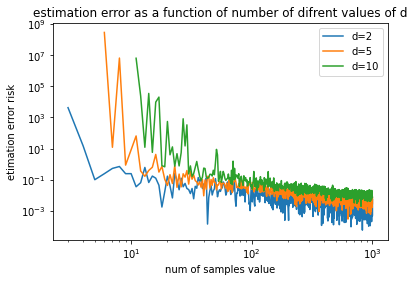

In [255]:
np.random.seed(15100873)
def estimation_error_for_n(d):
    x_test_noise,y_test_noise=draw_sample_with_noise(5,a,1000)
    X_mat_test=get_design_mat(x_test_noise,deg=d)
    estmiation_error=[]
    for i in range(d+1,1001):
        x_train_noise,y_train_noise=draw_sample_with_noise(5,a,i) # look into drawing iwth noise
        X_mat_train=get_design_mat(x_train_noise,deg=d)
        super_x=np.concatenate((x_train_noise, x_test_noise),axis=None)
        super_x_mat=get_design_mat(super_x,deg=d)
        super_y=np.concatenate((y_train_noise, y_test_noise),axis=None)
        b_noise=least_square_estimator(X_mat_train,y_train_noise)
        super_b=least_square_estimator(super_x_mat,super_y)
        estmiation_error.append(empyrical_estimation_error(X_test=X_mat_test,y_test= y_test_noise,b=b_noise,super_b=super_b))
    plt.plot(range(d+1,1001), estmiation_error, label="d={0}".format(d))
    plt.yscale("log")
    plt.xscale('log')
    plt.xlabel("num of samples value")
    plt.ylabel("etimation error risk")
    plt.legend()
    plt.title("estimation error as a function of number of difrent values of d".format(d))
    #plt.show()
d=[2,5,10]
for i in d:
    estimation_error_for_n(i)

increasing n and decreasing d lead to reducction in estimation error. 

i would assume optimzation error is farily minimial since we are working with a problem type with a closed form sollution so we know the ideal min of the risk function with out numeric optimzation 

In [256]:
ozone_data=np.loadtxt("ozone_wind.data")

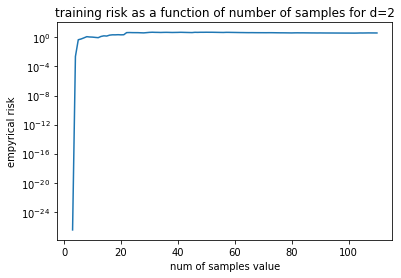

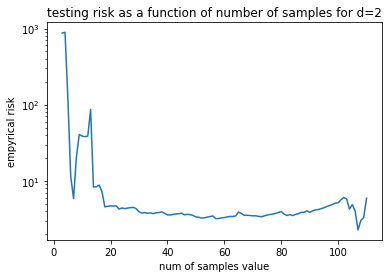

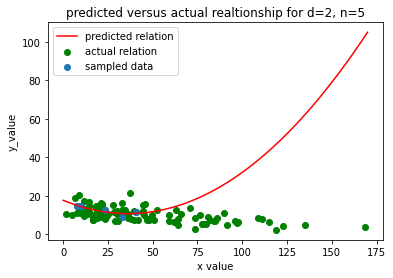

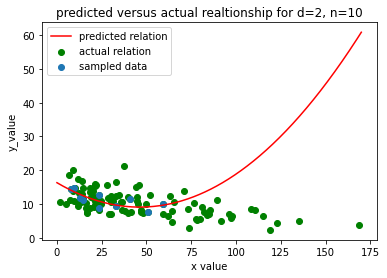

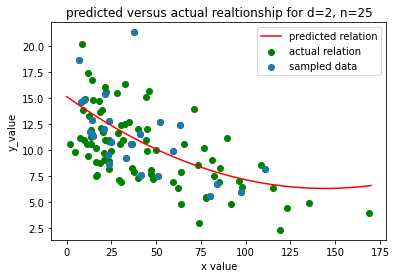

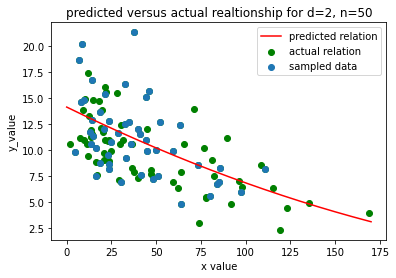

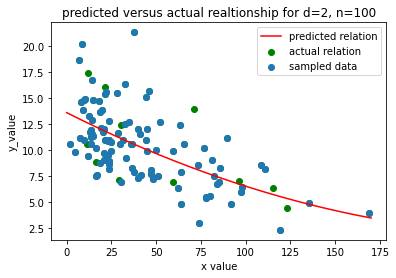

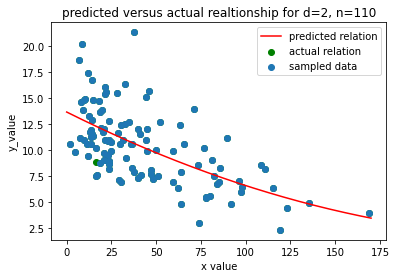

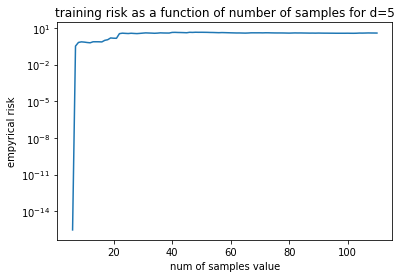

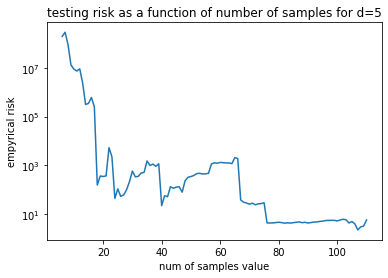

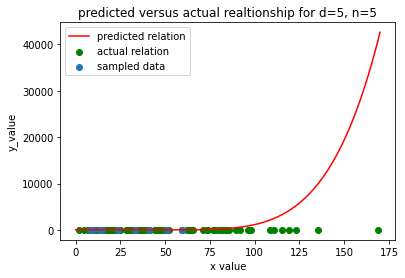

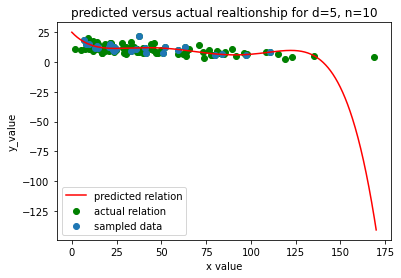

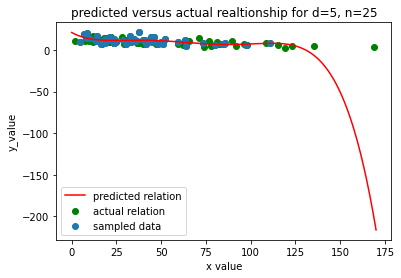

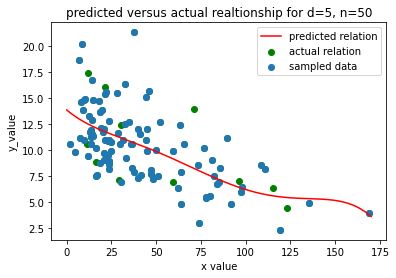

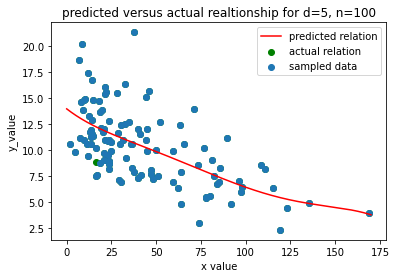

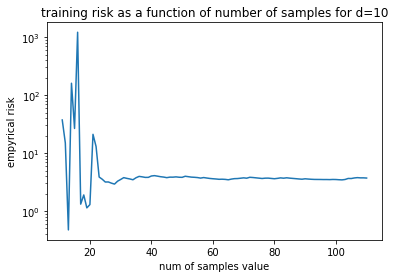

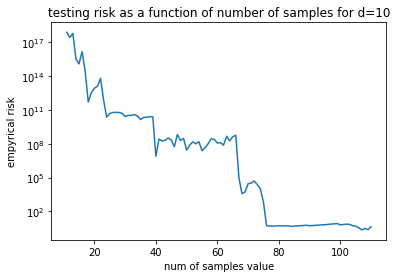

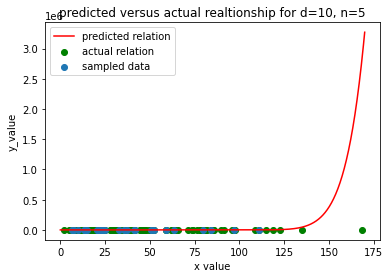

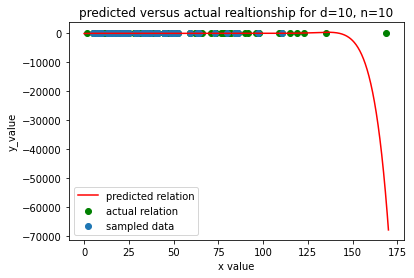

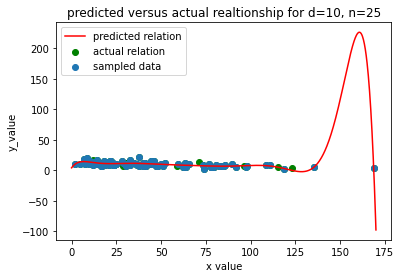

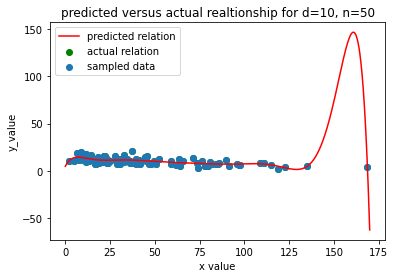

In [257]:
def train_test_split(n):
    np.random.seed(15100873)
    training_indecies=np.random.choice(range(len(ozone_data)), n, replace=False)
    testing_indecies=[i for i in range(len(ozone_data)) if i not in training_indecies]
    X_train,y_train=ozone_data[training_indecies,0],ozone_data[training_indecies,1] 
    X_test,y_test=ozone_data[testing_indecies,0],ozone_data[testing_indecies,1] 
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test=train_test_split(5)
def error_for_n_ozone(d):
    np.random.seed(15100873)
    epislon_t=[]
    epsilon_d=[]
    X_array=[]
    Y=[]
    n=[5,10,25,50,100,110]
    b=[]
    for i in range(d+1,111):
        X_train, y_train, X_test, y_test=train_test_split(i)
        X=get_design_mat(X_train,d)
        X_test=get_design_mat(X_test,deg=d)
        b_val=least_square_estimator(X,y_train)
        epislon_t.append(empirical_risk(X, y_train, b_val))
        epsilon_d.append(empirical_risk(X_test, y_test, b_val))
        if(i in n):
            b.append(b_val)
            X_array.append(X_train)
            Y.append(y_train)
    plt.plot(range(d+1,111), epislon_t)
    plt.yscale("log")
    plt.xlabel("num of samples value")
    plt.ylabel("empyrical risk")
    plt.title("training risk as a function of number of samples for d={0}".format(d))
    plt.show()
    plt.plot(range(d+1,111), epsilon_d)
    plt.yscale("log")
    plt.xlabel("num of samples value")
    plt.ylabel("empyrical risk")
    plt.title("testing risk as a function of number of samples for d={0}".format(d))
    plt.show()
    x_range = np.linspace(0, 170, 1000)
    for i in range(len(b)):
        plt.scatter(ozone_data[:,0],ozone_data[:,1],label="actual relation", color='g')
        plt.plot(x_range,get_design_mat(x_range,d)@b[i],label="predicted relation", color='r')
        plt.scatter(X_array[i],Y[i],label="sampled data")
        plt.xlabel("x value")
        plt.ylabel("y_value")
        plt.title("predicted versus actual realtionship for d={}, n={}".format(d,n[i]))
        plt.legend()
        plt.show()

d=[2,5,10]
for i in d:
    error_for_n_ozone(i)
X_train, y_train, X_test, y_test=train_test_split(3)
len(X_train)
X=get_design_mat(X_train,2)

b=least_square_estimator(X,y_train)